# 3-dimensjonal plotting

## Markus S. Heiervang

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib.animation import FuncAnimation
from IPython.display import Image

I tredimensjonale plots må vi håndtere 3 akser istedenfor 2. Altså, en x, y og z akse.  
I matplotlib er z-aksen høyden i kordinatsystemet.

Text(0.5, 0, 'z')

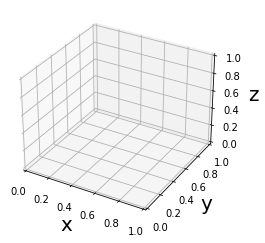

In [2]:
%matplotlib inline
fig = plt.figure()
# Vi må bruke nøkkelordargumentet projection for å lage et tredimensjonalt kordinatsystem
ax = fig.add_subplot(111, projection="3d")
ax.set_xlabel("x", fontsize=20)
ax.set_ylabel("y", fontsize=20)
ax.set_zlabel("z", fontsize=20)

## La oss plotte noen enkle data
Vi bruker numpy for å tilfeldig generere en 2d array

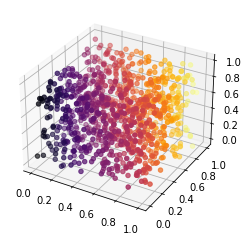

In [3]:
ax = plt.axes(projection="3d")

# Vi lager 3 arrays med helt tilfeldige kordinater
# og plotter det som punkter i kordinatsystemet
X = np.random.random(1000)
Y = np.random.random(1000)
Z = np.random.random(1000)

ax.scatter(X, Y, Z, c=Y+X, cmap="inferno")

### Plotting av overflater

Når vi skal plotte overflater benytter vi oss av funksjonen np.meshgrid(x, y).  
Den tar inn to arrays, en for x-aksen, og en for y-aksen, og så returnerer det to 2d-arrays for x og y aksen  
som vi skal bruke til å plotte overflaten

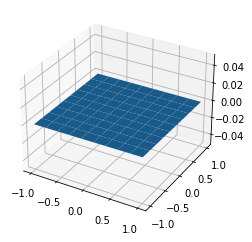

In [4]:
ax = plt.axes(projection="3d")

# Siden vi lager en kvadratisk overflate, trenger vi bare en array til å begynne med
a = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(a, a)

ax.plot_surface(X, Y, np.zeros(X.shape))

### Nå har vi en overflate, la oss se hvordan vi kan modifisere den

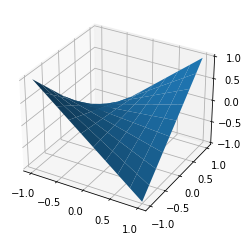

In [5]:
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, X * Y)

#### Vi kan også legge til farger

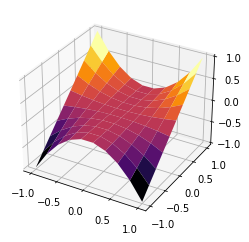

In [6]:
#%matplotlib notebook
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, X*Y*a, cmap="inferno")

Med surface plots kan vi også lage geometriske figurer

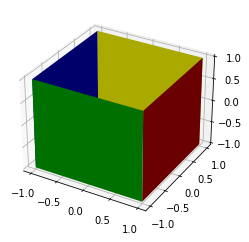

In [7]:
ax = plt.axes(projection="3d")
Z = np.array([[1, -1], 
              [1, -1]])
Y = np.array([[-1, -1],
              [1, 1]])
X = np.array([[1, 1], [1, 1]])
ax.plot_surface(X, Y, Z, color="r")
ax.plot_surface(-X, Y, Z, color="b")
ax.plot_surface(Y, X, Z, color="y")
ax.plot_surface(Y, -X, Z, color="g")


Ved bruk av matte kan vi rotere boksen rundt origo. Formelen under beskriver hvordan et punkt roteres rundt et annet:  

```Python    
ox, oy = origin
px, py = point

qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
```

MovieWriter ffmpeg unavailable; using Pillow instead.


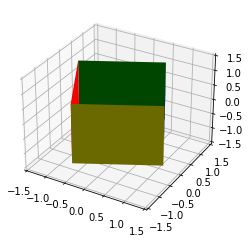

In [8]:
gif_path = "gifs/rotating_bucket.gif"

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)

surfaces = [ax.plot_surface(X, Y, Z, color="r"),
            ax.plot_surface(-X, Y, Z, color="b"),
            ax.plot_surface(Y, X, Z, color="y"),
            ax.plot_surface(Y, -X, Z, color="g")]

def next_frame(frame_number, surfaces):
    angle = frame_number/10

    Xi = np.cos(angle) * X - np.sin(angle) * Y
    Yi = np.sin(angle) * X + np.cos(angle) * Y
    
    Xj = np.cos(-angle) * X - np.sin(-angle) * Y
    Yj = np.sin(-angle) * X + np.cos(-angle) * Y
    
    for i in range(len(surfaces)):
        surfaces[i].remove()
        
    surfaces[0] = ax.plot_surface(Xi, Yi, Z, color="r")
    surfaces[1] = ax.plot_surface(-Xj, Yj, Z, color="b")
    surfaces[2] = ax.plot_surface(Yj, Xj, Z, color="y")
    surfaces[3] = ax.plot_surface(Yi, -Xi, Z, color="g")
    
ani = FuncAnimation(fig, next_frame, fargs=(surfaces,), interval=10, frames=100)
ani.save(gif_path, fps=10)

In [9]:
Image(url=gif_path)

### Plotte 2dimensjonale funksjoner

Vi har funksjonene $$ h(x) = -x^{4} + 2\alpha x^{3} + 2x^{2} - x $$
$$ g(x) = {- 4 y^3 + 6 \alpha y^2 + 4 y - 1}  $$

$$ f(x, y) = g(x) + h(y) $$

$\alpha$ er et hyperparameter vi starter med å sette til 1

In [10]:
alpha = 1

def g(x):
    return -np.power(x, 4) + 2 * alpha * np.power(x, 3) + 2 * np.power(x, 2) - x

def h(x):
    return -4 * np.power(x, 3) + 6 * alpha * np.power(x, 2) + 4 * x - 1

def f(x, y):
    return g(x) + h(y)

In [11]:
b = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(b, b)
Z = f(X, Y)

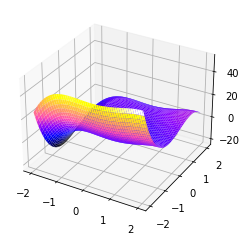

In [12]:
ax = plt.axes(projection="3d")
ax.plot_surface(X, Y, Z, cmap="gnuplot2")

Animasjonen produsert under viser hvordan funksjonen endrer seg når hyperparameteret $\alpha$ alternerer mellom 0 og 1

MovieWriter ffmpeg unavailable; using Pillow instead.


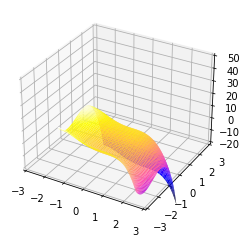

In [13]:
gif_path = "gifs/surfaceplot.gif"

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-20, 50)
surface = [ax.plot_surface(X, Y, Z, cmap="gnuplot2")]

def next_frame(frame_number, surface):
    global alpha
    alpha = np.cos(frame_number/10)
    surface[0].remove()
    surface[0] = ax.plot_surface(X, Y, f(X, Y), cmap="gnuplot2")
    
ani = FuncAnimation(fig, next_frame, fargs=(surface,), interval=10, frames=100)
ani.save(gif_path, fps=10)
Image(url=gif_path)